(image-filtering:convolution)=
# Faltung
Wenn wir einen sogenannten _linearen_ Filter auf ein Bild anwenden, berechnen wir jeden neuen Pixel als gewichtete Summe seiner Nachbarn. Dieser Prozess wird [_Faltung_](https://en.wikipedia.org/wiki/Convolution) genannt, und die Matrix, die die Gewichte definiert, wird als _Faltungskern_ bezeichnet. Im Kontext der Mikroskopie sprechen wir oft von der Punktspreizfunktion (PSF) von Mikroskopen. Diese PSF beschreibt technisch, wie ein Bild vom Mikroskop gefaltet wird, bevor wir es auf der Festplatte speichern.

In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.io import imread
from pyclesperanto_prototype import imshow
from skimage import filters
from skimage.morphology import ball
from scipy.ndimage import convolve
import matplotlib.pyplot as plt

cle.select_device('RTX')

<gfx90c on Platform: AMD Accelerated Parallel Processing (2 refs)>

Um das Prinzip der Faltung zu demonstrieren, definieren wir zunächst ein relativ einfaches Beispielbild.

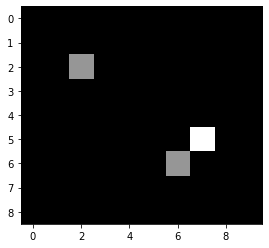

In [2]:
image = np.asarray([
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
  [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
]).astype(float)

imshow(image)

Als Nächstes definieren wir einen einfachen Faltungskern, der durch ein kleines Bild repräsentiert wird.

In [3]:
kernel = np.asarray([
  [0, 1, 0],
  [1, 1, 1],
  [0, 1, 0],
])

Als Nächstes falten wir das Bild mit dem Kern unter Verwendung von [scipy.ndimage.convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.convolve.html). Wenn wir das Ergebnis ausgeben, können wir sehen, wie sich eine `1` im Originalbild ausbreitet, da für jeden direkt benachbarten Pixel der Kern die Intensitäten der Nachbarn summiert. Wenn es mehrere Pixel mit einer Intensität > 0 im Originalbild gibt, wird das resultierende Bild in ihrer Nachbarschaft die Summe berechnen. Man könnte diesen Kern als lokalen Summen-Kern bezeichnen.

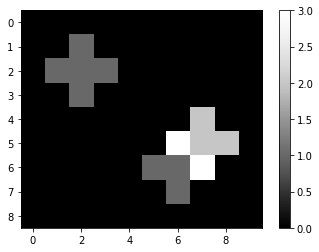

In [4]:
convolved = convolve(image, kernel)

imshow(convolved, colorbar=True)

In [5]:
convolved

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 2., 0., 0.],
       [0., 0., 0., 0., 0., 0., 3., 2., 2., 0.],
       [0., 0., 0., 0., 0., 1., 1., 3., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Andere Kerne
Je nachdem, welcher Kern für die Faltung verwendet wird, können die Bilder ganz unterschiedlich aussehen. Ein _Mittelwert_-Kern zum Beispiel berechnet die durchschnittliche Pixelintensität lokal:

In [6]:
mean_kernel = np.asarray([
  [0, 0.2, 0],
  [0.2, 0.2, 0.2],
  [0, 0.2, 0],
])

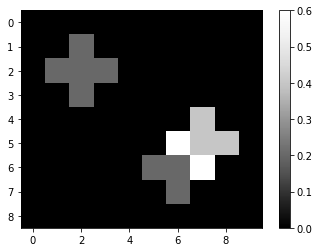

In [7]:
mean_convolved = convolve(image, mean_kernel)

imshow(mean_convolved, colorbar=True)

In [8]:
mean_convolved

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.2, 0.2, 0.2, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.2, 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.6, 0.4, 0.4, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.2, 0.2, 0.6, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ]])

Der folgende Kern ist eine einfache Form eines [Laplace-Operators](https://en.wikipedia.org/wiki/Laplace_operator).

In [9]:
laplace_operator = np.asarray([
  [0, 1, 0],
  [1, -4, 1],
  [0, 1, 0],
])

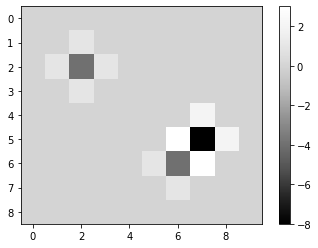

In [10]:
laplacian = convolve(image, laplace_operator)

imshow(laplacian, colorbar=True)

In [11]:
laplacian

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1., -4.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  3., -8.,  2.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1., -4.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

Um zu demonstrieren, was diese verschiedenen Kerne bewirken, wenden wir sie auf das zuvor gezeigte MRT-Bild an.

In [12]:
# Datensatz öffnen und einzelne Ebene extrahieren
noisy_mri = imread('../../data/Haase_MRT_tfl3d1.tif')[90].astype(float)

# Heranzoomen durch Ausschneiden eines Teils
noisy_mri_zoom = noisy_mri[50:100, 50:100]

In [13]:
convolved_mri = convolve(noisy_mri_zoom, kernel)
mean_mri = convolve(noisy_mri_zoom, mean_kernel)
laplacian_mri = convolve(noisy_mri_zoom, laplace_operator)

Text(0.5, 1.0, 'Mean-kernel')

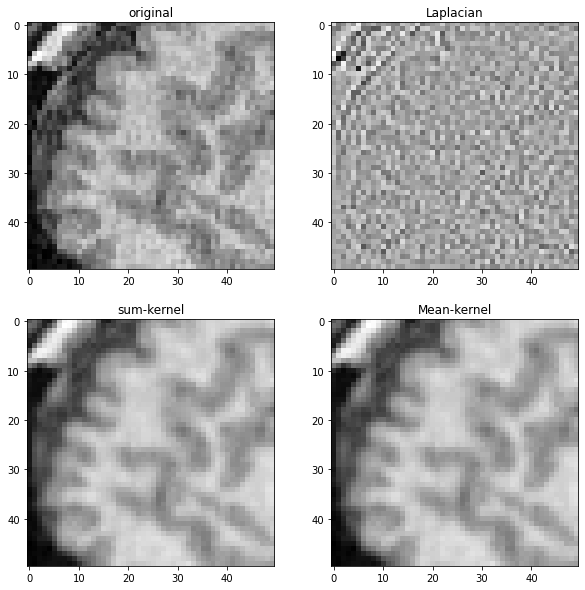

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(10,10))

imshow(noisy_mri_zoom, plot=axes[0,0])
axes[0,0].set_title("Original")
imshow(laplacian_mri, plot=axes[0,1])
axes[0,1].set_title("Laplace")
imshow(convolved_mri, plot=axes[1,0])
axes[1,0].set_title("Summen-Kern")
imshow(mean_mri, plot=axes[1,1])
axes[1,1].set_title("Mittelwert-Kern")